In [1]:
import pandas as pd
import collections
from collections import Counter
import time
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
### SKIP IF ALREADY SAVED DATAFRAMES

In [3]:
### LOAD DATAFRAMES

df_all = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_allprojects.pkl')
df_success = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_successprojects.pkl')
df_fail = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_failprojects.pkl')

In [4]:
### RETURNING CREATORS

df0 = df_all.loc[df_all['creator_id'].isin(df_all['creator_id'].value_counts()[df_all['creator_id'].value_counts()>=1].index)]
df1 = df_all.loc[df_all['creator_id'].isin(df_all['creator_id'].value_counts()[df_all['creator_id'].value_counts()==1].index)]
df2 = df_all.loc[df_all['creator_id'].isin(df_all['creator_id'].value_counts()[df_all['creator_id'].value_counts()>=2].index)]
df2_2 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==2].index)]
df2_3 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==3].index)]
df2_4 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==4].index)]
df2_5 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()==5].index)]
df6 = df2.loc[df2['creator_id'].isin(df2['creator_id'].value_counts()[df2['creator_id'].value_counts()>5].index)]
print('Number of projects: ' + str(len(df0)))
print('Number of projects with returning creators: ' + str(len(df2)))

print()
print('Number of creators with = 1 project: ' + str(len(df1)))
print('Number of creators with = 2 project: ' + str(len(df2_2)/2))
print('Number of creators with = 3 project: ' + str(len(df2_3)/3))
print('Number of creators with = 4 project: ' + str(len(df2_4)/4))
print('Number of creators with = 5 project: ' + str(len(df2_5)/5))

# first sort by creator id, then sort by date
df2.sort_values(['creator_id', 'created_at'], ascending = [True, True], inplace = True)

creator_freq = df2['creator_id'].value_counts().to_dict()
print()
print('Average number of rounds for creators with >1 project: ' + str(round(sum(creator_freq.values()) / len(creator_freq.values()), 4)))
df2_s = pd.DataFrame() # success first
df2_f = pd.DataFrame() # fail first
df2_ss = pd.DataFrame() # success first, success second
df2_sss = pd.DataFrame() # success first, success second, success third
df2_ssf = pd.DataFrame() # success first, success second, fail third
df2_sf = pd.DataFrame() # success first, fail second
df2_sfs = pd.DataFrame() # success first, fail second, success third
df2_sff = pd.DataFrame() # success first, fail second, fail third
df2_fs = pd.DataFrame() # fail first, success second
df2_fss = pd.DataFrame() # fail first, success second, success third
df2_fsf = pd.DataFrame() # fail first, success second, fail third
df2_ff = pd.DataFrame() # fail first, fail second
df2_ffs = pd.DataFrame() # fail first, fail second, success third
df2_fff = pd.DataFrame() # fail first, fail second, fail third

count = 0
for k,v in creator_freq.items():
    temp = df2.loc[df2['creator_id'] == k]
    if list(temp['state'])[0] == 'successful':
        df2_s = df2_s.append(temp)
        if list(temp['state'])[1] == 'successful':
            df2_ss = df2_ss.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_sss = df2_sss.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_ssf = df2_ssf.append(temp)
        else:
            df2_sf = df2_sf.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_sfs = df2_sfs.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_sff = df2_sff.append(temp)
    else:
        df2_f = df2_f.append(temp)
        if list(temp['state'])[1] == 'successful':
            df2_fs = df2_fs.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_fss = df2_fss.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_fsf = df2_fsf.append(temp)
        else:
            df2_ff = df2_ff.append(temp)
            if len(list(temp['state'])) >= 3 and list(temp['state'])[2] == 'successful':
                df2_ffs = df2_ffs.append(temp)
            elif len(list(temp['state'])) >= 3:
                df2_fff = df2_fff.append(temp)

print('Number of returning projects with S: ' + str(len(df2_s)))
print('Number of returning projects with F: ' + str(len(df2_f)))
print('Number of returning projects with S/S: ' + str(len(df2_ss)))
print('Number of returning projects with S/F: ' + str(len(df2_sf)))
print('Number of returning projects with F/S: ' + str(len(df2_fs)))
print('Number of returning projects with F/F: ' + str(len(df2_ff)))
print('Number of returning projects with S/S/S: ' + str(len(df2_sss)))
print('Number of returning projects with S/S/F: ' + str(len(df2_ssf)))
print('Number of returning projects with S/F/S: ' + str(len(df2_sfs)))
print('Number of returning projects with S/F/F: ' + str(len(df2_sff)))
print('Number of returning projects with F/S/S: ' + str(len(df2_fss)))
print('Number of returning projects with F/S/F: ' + str(len(df2_fsf)))
print('Number of returning projects with F/F/S: ' + str(len(df2_ffs)))
print('Number of returning projects with F/F/F: ' + str(len(df2_fff)))
        

Number of projects: 21592
Number of projects with returning creators: 3037

Number of creators with = 1 project: 18555
Number of creators with = 2 project: 969.0
Number of creators with = 3 project: 178.0
Number of creators with = 4 project: 54.0
Number of creators with = 5 project: 29.0

Average number of rounds for creators with >1 project: 2.4219


/Users/sarinaliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Number of returning projects with S: 1753
Number of returning projects with F: 1284
Number of returning projects with S/S: 1526
Number of returning projects with S/F: 227
Number of returning projects with F/S: 354
Number of returning projects with F/F: 930
Number of returning projects with S/S/S: 591
Number of returning projects with S/S/F: 49
Number of returning projects with S/F/S: 55
Number of returning projects with S/F/F: 28
Number of returning projects with F/S/S: 74
Number of returning projects with F/S/F: 38
Number of returning projects with F/F/S: 42
Number of returning projects with F/F/F: 222


In [5]:
### SKIP TO HERE IF NOT ALREADY SAVED DATAFRAMES
df2_s = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_s.pkl')
df2_f = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_f.pkl')

df2_ss = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_ss.pkl')
df2_sf = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_sf.pkl')
df2_fs = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_fs.pkl')
df2_ff = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_ff.pkl')

df2_sss = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_sss.pkl')
df2_ssf = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_ssf.pkl')
df2_sfs = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_sfs.pkl')
df2_sff = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_sff.pkl')
df2_fss = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_fss.pkl')
df2_fsf = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_fsf.pkl')
df2_ffs = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_ffs.pkl')
df2_fff = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_fff.pkl')


print('Number of returning projects with S: ' + str(len(df2_s)))
print('Number of returning projects with F: ' + str(len(df2_f)))
print('Number of returning projects with S/S: ' + str(len(df2_ss)))
print('Number of returning projects with S/F: ' + str(len(df2_sf)))
print('Number of returning projects with F/S: ' + str(len(df2_fs)))
print('Number of returning projects with F/F: ' + str(len(df2_ff)))
print('Number of returning projects with S/S/S: ' + str(len(df2_sss)))
print('Number of returning projects with S/S/F: ' + str(len(df2_ssf)))
print('Number of returning projects with S/F/S: ' + str(len(df2_sfs)))
print('Number of returning projects with S/F/F: ' + str(len(df2_sff)))
print('Number of returning projects with F/S/S: ' + str(len(df2_fss)))
print('Number of returning projects with F/S/F: ' + str(len(df2_fsf)))
print('Number of returning projects with F/F/S: ' + str(len(df2_ffs)))
print('Number of returning projects with F/F/F: ' + str(len(df2_fff)))

Number of returning projects with S: 3326
Number of returning projects with F: 3281
Number of returning projects with S/S: 2874
Number of returning projects with S/F: 452
Number of returning projects with F/S: 834
Number of returning projects with F/F: 2447
Number of returning projects with S/S/S: 1271
Number of returning projects with S/S/F: 115
Number of returning projects with S/F/S: 104
Number of returning projects with S/F/F: 60
Number of returning projects with F/S/S: 174
Number of returning projects with F/S/F: 62
Number of returning projects with F/F/S: 77
Number of returning projects with F/F/F: 522


In [7]:
### PROBABILITY OF SUCCESS

prob_success1 = len(df2_s)/(len(df2_s)+len(df2_f))
print('First Round')
print('Probability of success for projects with returning creators: ' + 
      str(round(prob_success1,4)))

print()
print('Second Round')
prob_success2 = len(df2_ss)/(len(df2_ss)+len(df2_sf))
print('Probability of success for projects with success first: ' + 
      str(round(prob_success2,4)))
prob_success3 = len(df2_fs)/(len(df2_fs)+len(df2_ff))
print('Probability of success for projects with fail first: ' + 
      str(round(prob_success3,4)))

print()
print('Third Round')
prob_success4 = len(df2_sss)/(len(df2_sss)+len(df2_ssf))
print('Probability of success for projects with success first, success second: ' + 
      str(round(prob_success4,4)))
prob_success5 = len(df2_sfs)/(len(df2_sfs)+len(df2_sff))
print('Probability of success for projects with success first, fail second: ' + 
      str(round(prob_success5,4)))
prob_success6 = len(df2_fss)/(len(df2_fss)+len(df2_fsf))
print('Probability of success for projects with fail first, success second: ' + 
      str(round(prob_success6,4)))
prob_success7 = len(df2_ffs)/(len(df2_ffs)+len(df2_fff))
print('Probability of success for projects with fail first, fail second: ' + 
      str(round(prob_success7,4)))


First Round
Probability of success for projects with returning creators: 0.5034

Second Round
Probability of success for projects with success first: 0.8641
Probability of success for projects with fail first: 0.2542

Third Round
Probability of success for projects with success first, success second: 0.917
Probability of success for projects with success first, fail second: 0.6341
Probability of success for projects with fail first, success second: 0.7373
Probability of success for projects with fail first, fail second: 0.1285


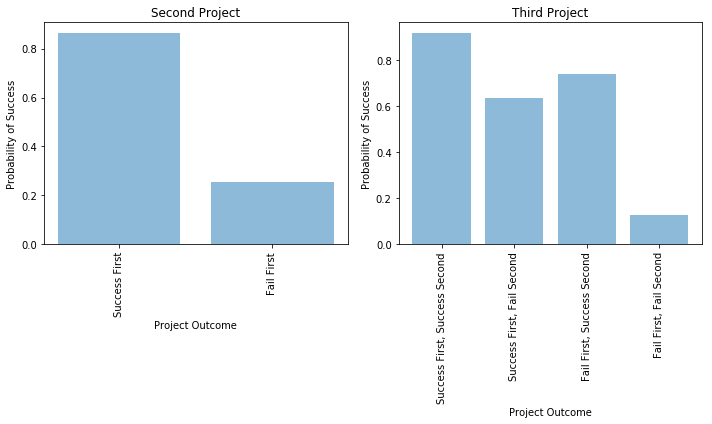

In [8]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
objects = ('Success First', 'Fail First')
y_pos = np.arange(len(objects))
performance = [prob_success2, prob_success3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Probability of Success')
plt.xlabel('Project Outcome')
plt.title('Second Project')

plt.subplot(1, 2, 2)
objects = ('Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second')
y_pos = np.arange(len(objects))
performance = [prob_success4, prob_success5, prob_success6, prob_success7]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Probability of Success')
plt.xlabel('Project Outcome')
plt.title('Third Project')

plt.tight_layout()
plt.show()

First Project Mean Goal Size [S, F]: [6464.498368110163, 8749.254376833152]
First Project Median Goal Size [S, F]: [3176.778692, 5000.0]
Second Project Mean Goal Size [SS, SF, FS, FF]: [6393.6719368310205, 6914.841650181526, 7389.078117911906, 9212.837131201897]
Second Project Median Goal Size [SS, SF, FS, FF]: [3166.99006, 3311.375569195, 4023.8698395, 5000.0]


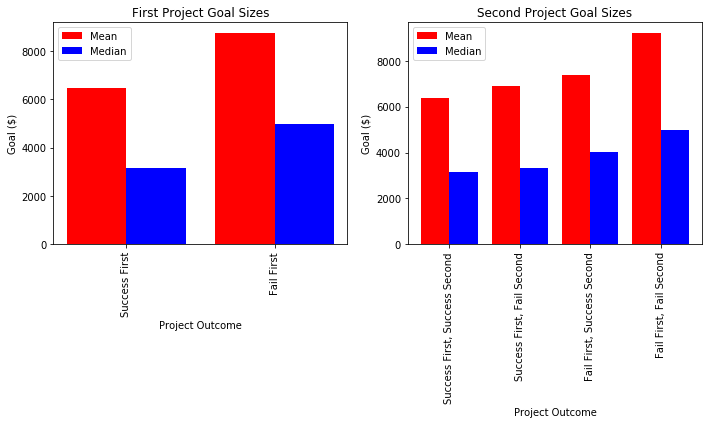

In [9]:
### GOAL

# First Project
goal_s = list(df2_s['goal'])
mean_goal_s = np.mean(goal_s)
median_goal_s = statistics.median(goal_s)
goal_f = list(df2_f['goal'])
mean_goal_f = np.mean(goal_f)
median_goal_f = statistics.median(goal_f)
mean_goal1 = [mean_goal_s, mean_goal_f]
median_goal1 = [median_goal_s, median_goal_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_goal1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Goal Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

print('First Project Mean Goal Size [S, F]: ' + str(mean_goal1))
print('First Project Median Goal Size [S, F]: ' + str(median_goal1))

# Second Project
goal_ss = list(df2_ss['goal'])
mean_goal_ss = np.mean(goal_ss)
median_goal_ss = statistics.median(goal_ss)
goal_sf = list(df2_sf['goal'])
mean_goal_sf = np.mean(goal_sf)
median_goal_sf = statistics.median(goal_sf)
goal_fs = list(df2_fs['goal'])
mean_goal_fs = np.mean(goal_fs)
median_goal_fs = statistics.median(goal_fs)
goal_ff = list(df2_ff['goal'])
mean_goal_ff = np.mean(goal_ff)
median_goal_ff = statistics.median(goal_ff)
mean_goal2 = [mean_goal_ss, mean_goal_sf, mean_goal_fs, mean_goal_ff]
median_goal2 = [median_goal_ss, median_goal_sf, median_goal_fs, median_goal_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_goal2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_goal2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Goal Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Goal ($)')

print('Second Project Mean Goal Size [SS, SF, FS, FF]: ' + str(mean_goal2))
print('Second Project Median Goal Size [SS, SF, FS, FF]: ' + str(median_goal2))

plt.tight_layout()
plt.show()

# Note: Compared to the first project, after you fail first, the second project you are successful if you lower your goal.

First Project Mean Pledged Size [S, F]: [15860.46768682045, 1990.9661899415087]
First Project Median Pledged Size [S, F]: [4855.99113406, 170.0]
Second Project Mean Pledged Size [SS, SF, FS, FF]: [17263.99741367831, 6936.254335073798, 5544.418871338265, 779.8589008998681]
Second Project Median Pledged Size [SS, SF, FS, FF]: [5363.8989513, 2086.119798885, 2296.3684760019996, 64.3315185]


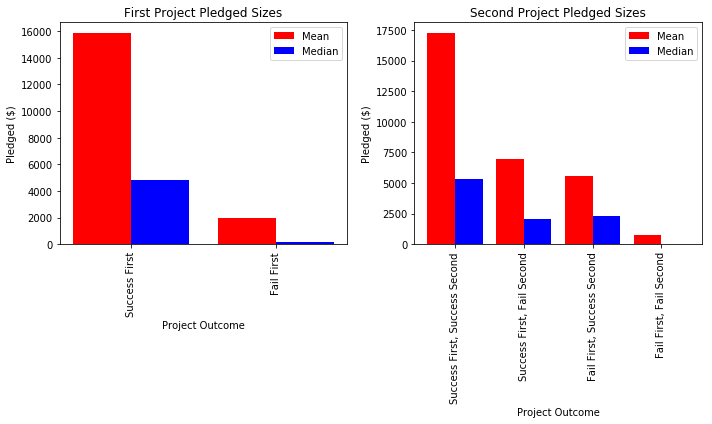

In [10]:
### PLEDGED

# First Project
pledged_s = list(df2_s['usd_pledged'])
mean_pledged_s = np.mean(pledged_s)
median_pledged_s = statistics.median(pledged_s)
pledged_f = list(df2_f['usd_pledged'])
mean_pledged_f = np.mean(pledged_f)
median_pledged_f = statistics.median(pledged_f)
mean_pledged1 = [mean_pledged_s, mean_pledged_f]
median_pledged1 = [median_pledged_s, median_pledged_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_pledged1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Pledged Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

print('First Project Mean Pledged Size [S, F]: ' + str(mean_pledged1))
print('First Project Median Pledged Size [S, F]: ' + str(median_pledged1))

# Second Project
pledged_ss = list(df2_ss['usd_pledged'])
mean_pledged_ss = np.mean(pledged_ss)
median_pledged_ss = statistics.median(pledged_ss)
pledged_sf = list(df2_sf['usd_pledged'])
mean_pledged_sf = np.mean(pledged_sf)
median_pledged_sf = statistics.median(pledged_sf)
pledged_fs = list(df2_fs['usd_pledged'])
mean_pledged_fs = np.mean(pledged_fs)
median_pledged_fs = statistics.median(pledged_fs)
pledged_ff = list(df2_ff['usd_pledged'])
mean_pledged_ff = np.mean(pledged_ff)
median_pledged_ff = statistics.median(pledged_ff)
mean_pledged2 = [mean_pledged_ss, mean_pledged_sf, mean_pledged_fs, mean_pledged_ff]
median_pledged2 = [median_pledged_ss, median_pledged_sf, median_pledged_fs, median_pledged_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_pledged2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pledged2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Pledged Sizes')
plt.xlabel('Project Outcome')
plt.ylabel('Pledged ($)')

print('Second Project Mean Pledged Size [SS, SF, FS, FF]: ' + str(mean_pledged2))
print('Second Project Median Pledged Size [SS, SF, FS, FF]: ' + str(median_pledged2))

plt.tight_layout()
plt.show()


First Project Mean P/G [S, F]: [2.653071073263754, 0.44600624364006375]
First Project Median P/G [S, F]: [1.3687108498023715, 0.04]
Second Project Mean P/G [SS, SF, FS, FF]: [2.893373363941442, 0.16965849351535914]
Second Project Median P/G [SS, SF, FS, FF]: [1.4601164999999998, 0.013]


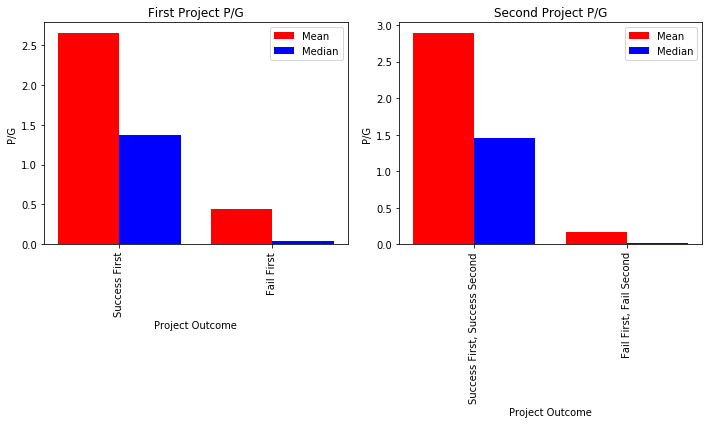

In [11]:
### P/G

# First Project
pg_s = list(df2_s['P/G'])
mean_pg_s = np.mean(pg_s)
median_pg_s = statistics.median(pg_s)
pg_f = list(df2_f['P/G'])
mean_pg_f = np.mean(pg_f)
median_pg_f = statistics.median(pg_f)
mean_pg1 = [mean_pg_s, mean_pg_f]
median_pg1 = [median_pg_s, median_pg_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_pg1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project P/G')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

print('First Project Mean P/G [S, F]: ' + str(mean_pg1))
print('First Project Median P/G [S, F]: ' + str(median_pg1))

# Second Project
pg_ss = list(df2_ss['P/G'])
mean_pg_ss = np.mean(pg_ss)
median_pg_ss = statistics.median(pg_ss)
pg_ff = list(df2_ff['P/G'])
mean_pg_ff = np.mean(pg_ff)
median_pg_ff = statistics.median(pg_ff)
mean_pg2 = [mean_pg_ss, mean_pg_ff]
median_pg2 = [median_pg_ss, median_pg_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second','Fail First, Fail Second']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_pg2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_pg2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project P/G')
plt.xlabel('Project Outcome')
plt.ylabel('P/G')

print('Second Project Mean P/G [SS, SF, FS, FF]: ' + str(mean_pg2))
print('Second Project Median P/G [SS, SF, FS, FF]: ' + str(median_pg2))

plt.tight_layout()
plt.show()


First Project Mean Backers [S, F]: [245.3782321106434, 32.73239865894544]
First Project Median Backers [S, F]: [98.0, 5]
Second Project Mean Backers [SS, SF, FS, FF]: [268.4947807933194, 98.39380530973452, 89.6642685851319, 13.328565590519004]
Second Project Median Backers [SS, SF, FS, FF]: [111.0, 37.0, 43.0, 2]


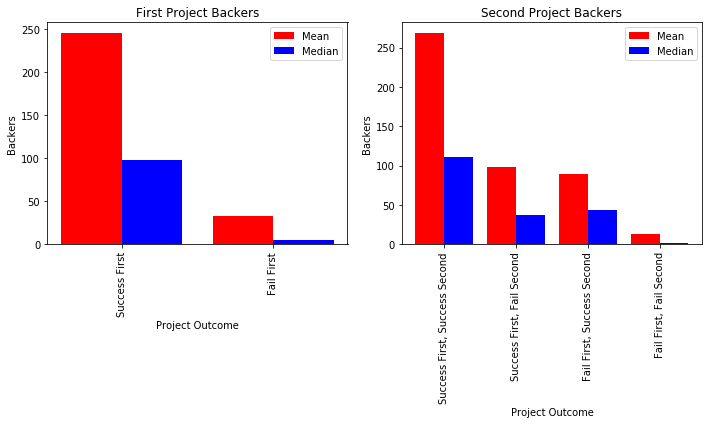

In [12]:
### NUMBER OF BACKERS

# First Project
backers_s = list(df2_s['backers_count'])
mean_backers_s = np.mean(backers_s)
median_backers_s = statistics.median(backers_s)
backers_f = list(df2_f['backers_count'])
mean_backers_f = np.mean(backers_f)
median_backers_f = statistics.median(backers_f)
mean_backers1 = [mean_backers_s, mean_backers_f]
median_backers1 = [median_backers_s, median_backers_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_backers1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Backers')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

print('First Project Mean Backers [S, F]: ' + str(mean_backers1))
print('First Project Median Backers [S, F]: ' + str(median_backers1))

# Second Project
backers_ss = list(df2_ss['backers_count'])
mean_backers_ss = np.mean(backers_ss)
median_backers_ss = statistics.median(backers_ss)
backers_sf = list(df2_sf['backers_count'])
mean_backers_sf = np.mean(backers_sf)
median_backers_sf = statistics.median(backers_sf)
backers_fs = list(df2_fs['backers_count'])
mean_backers_fs = np.mean(backers_fs)
median_backers_fs = statistics.median(backers_fs)
backers_ff = list(df2_ff['backers_count'])
mean_backers_ff = np.mean(backers_ff)
median_backers_ff = statistics.median(backers_ff)
mean_backers2 = [mean_backers_ss, mean_backers_sf, mean_backers_fs, mean_backers_ff]
median_backers2 = [median_backers_ss, median_backers_sf, median_backers_fs, median_backers_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_backers2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_backers2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Backers')
plt.xlabel('Project Outcome')
plt.ylabel('Backers')

print('Second Project Mean Backers [SS, SF, FS, FF]: ' + str(mean_backers2))
print('Second Project Median Backers [SS, SF, FS, FF]: ' + str(median_backers2))

plt.tight_layout()
plt.show()

First Project Mean Duration [S, F]: [2.5402415985430395, 2.0267458458589838]
First Project Median Duration [S, F]: [1.583657699260689, 1.3243841800691016]
Second Project Mean Duration [SS, SF, FS, FF]: [2.5647276758117794, 2.3845491514847263, 2.3496103651199065, 1.9167053844517055]
Second Project Median Duration [SS, SF, FS, FF]: [1.5894088250348133, 1.5426316838204146, 1.478780460166115, 1.2717041874006083]


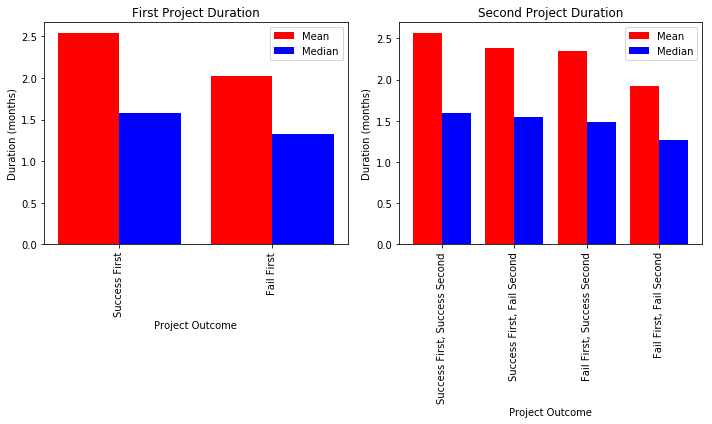

In [13]:
### DURATION

# First Project
duration_s = list(df2_s['duration'])
mean_duration_s = np.mean(duration_s)
median_duration_s = statistics.median(duration_s)
duration_f = list(df2_f['duration'])
mean_duration_f = np.mean(duration_f)
median_duration_f = statistics.median(duration_f)
mean_duration1 = [mean_duration_s, mean_duration_f]
median_duration1 = [median_duration_s, median_duration_f]

fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels1 = ['Success First', 'Fail First']
xval = np.arange(2)
plt.bar(xval - 0.2, mean_duration1, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration1, 0.4, color = 'blue')
plt.xticks(xval, labels1, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('First Project Duration')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (months)')

print('First Project Mean Duration [S, F]: ' + str(mean_duration1))
print('First Project Median Duration [S, F]: ' + str(median_duration1))

# Second Project
duration_ss = list(df2_ss['duration'])
mean_duration_ss = np.mean(duration_ss)
median_duration_ss = statistics.median(duration_ss)
duration_sf = list(df2_sf['duration'])
mean_duration_sf = np.mean(duration_sf)
median_duration_sf = statistics.median(duration_sf)
duration_fs = list(df2_fs['duration'])
mean_duration_fs = np.mean(duration_fs)
median_duration_fs = statistics.median(duration_fs)
duration_ff = list(df2_ff['duration'])
mean_duration_ff = np.mean(duration_ff)
median_duration_ff = statistics.median(duration_ff)
mean_duration2 = [mean_duration_ss, mean_duration_sf, mean_duration_fs, mean_duration_ff]
median_duration2 = [median_duration_ss, median_duration_sf, median_duration_fs, median_duration_ff]

plt.subplot(1, 2, 2)
labels2 = ['Success First, Success Second', 'Success First, Fail Second', 
           'Fail First, Success Second', 'Fail First, Fail Second']
xval = np.arange(4)
plt.bar(xval - 0.2, mean_duration2, 0.4, color = 'red')
plt.bar(xval + 0.2, median_duration2, 0.4, color = 'blue')
plt.xticks(xval, labels2, rotation='vertical')
plt.legend(['Mean', 'Median'])
plt.title('Second Project Duration')
plt.xlabel('Project Outcome')
plt.ylabel('Duration (months)')

print('Second Project Mean Duration [SS, SF, FS, FF]: ' + str(mean_duration2))
print('Second Project Median Duration [SS, SF, FS, FF]: ' + str(median_duration2))

plt.tight_layout()
plt.show()

In [14]:
### SAVE DATAFRAMES

df2_s.to_pickle('../Desktop/saved_dataframes/Store_subset_s.pkl')
df2_f.to_pickle('../Desktop/saved_dataframes/Store_subset_f.pkl')

df2_ss.to_pickle('../Desktop/saved_dataframes/Store_subset_ss.pkl')
df2_sf.to_pickle('../Desktop/saved_dataframes/Store_subset_sf.pkl')
df2_fs.to_pickle('../Desktop/saved_dataframes/Store_subset_fs.pkl')
df2_ff.to_pickle('../Desktop/saved_dataframes/Store_subset_ff.pkl')

df2_sss.to_pickle('../Desktop/saved_dataframes/Store_subset_sss.pkl')
df2_ssf.to_pickle('../Desktop/saved_dataframes/Store_subset_ssf.pkl')
df2_sfs.to_pickle('../Desktop/saved_dataframes/Store_subset_sfs.pkl')
df2_sff.to_pickle('../Desktop/saved_dataframes/Store_subset_sff.pkl')
df2_fss.to_pickle('../Desktop/saved_dataframes/Store_subset_fss.pkl')
df2_fsf.to_pickle('../Desktop/saved_dataframes/Store_subset_fsf.pkl')
df2_ffs.to_pickle('../Desktop/saved_dataframes/Store_subset_ffs.pkl')
df2_fff.to_pickle('../Desktop/saved_dataframes/Store_subset_fff.pkl')